# Si4713 Functional Test 
- https://www.silabs.com/documents/public/data-sheets/Si4712-13-B30.pdf
- https://github.com/adafruit/Adafruit_CircuitPython_SI4713
- https://cdn-shop.adafruit.com/datasheets/SiLabs+Programming+guide+AN332.pdf

In [1]:
import os, sys

def gen_relative_path(target_path): 
    
    def del_same_parents(target_path, current_path):
        if len(target_path) * len(current_path) > 0:
            if target_path[0] == current_path[0]:
                target_path.pop(0)
                current_path.pop(0)
                del_same_parents(target_path, current_path)
            
    current_path = os.getcwd().replace('\\', '/').split('/')
    target_path = target_path.replace('\\', '/').split('/')
    del_same_parents(target_path, current_path)
    
    return ['..'] * len(current_path) + target_path


def append_source_relative_path(source_relative_path):
    sys.path.append(os.sep.join(source_relative_path))

In [2]:
# paths = [' ']
# paths = [gen_relative_path(p) for p in paths]
# print(paths)

In [3]:
paths =[['..', '..', '..', '..', '..', 'Signal Generators', 'bitbucket', 'github', 'codes'],
        ['..', '..', '..', '..', '..', 'FX2LP', 'bitbucket', 'github', 'codes'], 
        ['..', '..', '..', '..', '..', 'Utilities', 'bitbucket', 'github', 'codes'],
        ['..', '..', 'codes']]

for path in paths:
    append_source_relative_path(path)

In [4]:
%pylab inline
 
from array import array
from utilities.adapters import peripherals
from fm_transceivers.si47xx import Si4713
import fx2lp

Populating the interactive namespace from numpy and matplotlib


## Generators

## Debug mode?

In [5]:
cls = Si4713

cls.DEBUG_MODE_SHOW_BUS_DATA = False         # whether to show bus data. 
cls.DEBUG_MODE_PRINT_REGISTER = False        # whether to print registers. 

## Generators

In [6]:
with_hardware_device = False

if with_hardware_device:
    _i2c = peripherals.I2C.get_Ftdi_i2c() 
    
else:
    _i2c =  None  # using None for testing without actual hardware device.

    
bus = peripherals.I2C(_i2c)


****** Virtual device. Data may not be real ! ******



In [7]:
bus = fx2lp.I2C(as_400KHz = True)
pin_reset = fx2lp.GPIO().Pin(id = 1, mode = fx2lp.Pin.OUT, value = 1)

In [8]:
freq = 88.80e6

si = Si4713(bus, pin_reset = pin_reset, freq = freq)
si.start()

## Noise Level Measurement

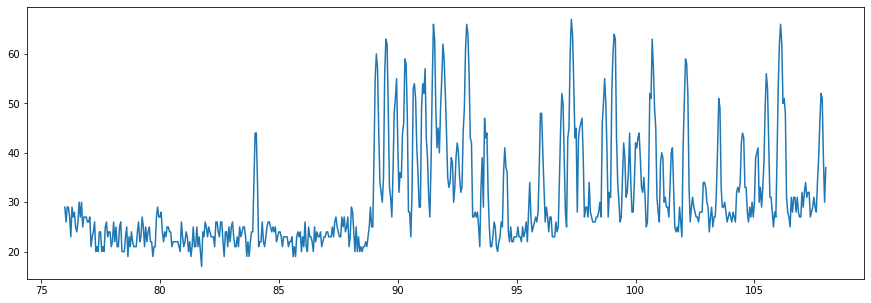

In [9]:
plt.figure(figsize = (15, 5))
 
noise_levels = si.scan_noise_levels()
nl = np.array(noise_levels).T
plt.plot(nl[0] / 1e6, nl[1]);

In [10]:
noise_levels_sorted = sorted(noise_levels, key = lambda x: x[1])
noise_levels_sorted[:30]

[(81750000, 17),
 (78650000, 19),
 (79700000, 19),
 (81300000, 19),
 (82700000, 19),
 (83650000, 19),
 (83750000, 19),
 (85600000, 19),
 (85700000, 19),
 (77300000, 20),
 (77400000, 20),
 (77550000, 20),
 (77650000, 20),
 (78400000, 20),
 (78450000, 20),
 (78500000, 20),
 (80850000, 20),
 (81200000, 20),
 (81700000, 20),
 (85950000, 20),
 (86200000, 20),
 (86450000, 20),
 (88200000, 20),
 (88300000, 20),
 (88400000, 20),
 (88500000, 20),
 (94200000, 20),
 (77100000, 21),
 (77350000, 21),
 (77600000, 21)]

## RDS

In [46]:
si.set_rds(program_id = 0x0520,
           station_name = "Wei Lin",
           radio_text = "My Radio Station !",
           program_type_code = 4,
           repeat_count = 3, message_count = 1, rds_mix_ratio = 50,  
           rds_fifo_size = 20,
           enable = True)

In [12]:
# while True:
#     si.set_rds_buffer(message = time.strftime("%Y-%m-%d %H:%M:%S"), use_FIFO = True)
#     time.sleep(10)

In [13]:
si.set_rds(enable = False)

## Member functions test

In [14]:
# for f in dir(Si4713):
#     if not f.startswith('_'):
#         if f.islower():
#             if callable(getattr(Si4713, f)):
#                 print('si.{}()'.format(f))

In [15]:
# si.apply_signal()

In [16]:
si.close()

In [17]:
si.enable(False)

In [18]:
si.enable(True)

In [19]:
si.enable_output(False)

In [20]:
si.enable_output(True)

In [21]:
# si.enable_output_channel(0)

In [22]:
# si.load_registers()

In [23]:
si.mute(True)

In [24]:
si.mute(False)

In [25]:
si.mute_line_input(True)

In [26]:
si.mute_line_input(False)

In [27]:
si.pause()

In [28]:
si.resume()

In [29]:
si.power_down()

In [30]:
si.power_up()

In [31]:
si.reset()

In [32]:
si.init()

In [33]:
# si.select_freq_source(0)

In [34]:
# si.select_phase_source(0)

In [35]:
si.set_frequency(88.8e6)

In [36]:
si.set_gpio_direction()

In [37]:
si.set_gpio_level()

In [38]:
# si.set_phase(0)

In [39]:
si.set_power(115)

In [40]:
si.stop()

In [41]:
si.start()

In [42]:
si.update()

In [43]:
si.read_all_registers()

[(1, 'GPO_IEN', 199),
 (257, 'DIGITAL_INPUT_FORMAT', 0),
 (259, 'DIGITAL_INPUT_SAMPLE_RATE', 0),
 (513, 'REFCLK_FREQ', 32768),
 (514, 'REFCLK_PRESCALE', 0),
 (8448, 'TX_COMPONENT_ENABLE', 3),
 (8449, 'TX_AUDIO_DEVIATION', 6625),
 (8450, 'TX_PILOT_DEVIATION', 675),
 (8451, 'TX_RDS_DEVIATION', 0),
 (8452, 'TX_LINE_INPUT_LEVEL', 190),
 (8453, 'TX_LINE_INPUT_MUTE', 0),
 (8454, 'TX_PREEMPHASIS', 0),
 (8455, 'TX_PILOT_FREQUENCY', 19000),
 (8704, 'TX_ACOMP_ENABLE', 3),
 (8705, 'TX_ACOMP_THRESHOLD', 65496),
 (8706, 'TX_ACOMP_ATTACK_TIME', 2),
 (8707, 'TX_ACOMP_RELEASE_TIME', 4),
 (8708, 'TX_ACOMP_GAIN', 15),
 (8709, 'TX_LIMITER_RELEASE_TIME', 13),
 (8960, 'TX_ASQ_INTERRUPT_SELECT', 7),
 (8961, 'TX_ASQ_LEVEL_LOW', 206),
 (8962, 'TX_ASQ_DURATION_LOW', 10000),
 (8963, 'TX_ASQ_LEVEL_HIGH', 236),
 (8964, 'TX_ASQ_DURATION_HIGH', 5000),
 (11264, 'TX_RDS_INTERRUPT_SOURCE', 0),
 (11265, 'TX_RDS_PI', 0),
 (11266, 'TX_RDS_PS_MIX', 0),
 (11267, 'TX_RDS_PS_MISC', 0),
 (11268, 'TX_RDS_PS_REPEAT_COUNT', 0),


In [44]:
si.write_all_registers()

In [45]:
si.print()


<< GPO_IEN >>     :  ('0xc7', '0b11000111')
[ Reserved_11 ] :  0
[ RDSREP ]      :  0
[ ASQREP ]      :  0
[ STCREP ]      :  0
[ CTSIEN ]      :  1
[ ERRIEN ]      :  1
[ Reserved_3 ]  :  0
[ RDSIEN ]      :  1
[ ASQIEN ]      :  1
[ STCIEN ]      :  1

<< DIGITAL_INPUT_FORMAT >>:  ('0x0', '0b0')
[ Reserved_8 ] :  0
[ IFALL ]      :  0
[ IMODE ]      :  0
[ IMONO ]      :  0
[ ISIZE ]      :  0

<< DIGITAL_INPUT_SAMPLE_RATE >>:  ('0x0', '0b0')
[ DISR ] :  0

<< REFCLK_FREQ >>:  ('0x8000', '0b1000000000000000')
[ REFCLKF ] :  32768

<< REFCLK_PRESCALE >>:  ('0x0', '0b0')
[ Reserved_13 ] :  0
[ RCLKSEL ]     :  0
[ REFCLKP ]     :  0

<< TX_COMPONENT_ENABLE >>:  ('0x3', '0b11')
[ Reserved_3 ] :  0
[ RDS ]        :  0
[ LMR ]        :  1
[ PILOT ]      :  1

<< TX_AUDIO_DEVIATION >>:  ('0x19e1', '0b1100111100001')
[ TXADEV ] :  6625

<< TX_PILOT_DEVIATION >>:  ('0x2a3', '0b1010100011')
[ TXPDEV ] :  675

<< TX_RDS_DEVIATION >>:  ('0x0', '0b0')
[ TXRDEV ] :  0

<< TX_LINE_INPUT_LEVEL >>: